(lecture15:the-generalized-linear-model)=
# The generalized linear model

Let me now show you the most general form of a linear model.
It is called the *generalize linear model*.

The form of the generalized linear model is:

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$

where the weight vector is:

$$
\mathbf{w} = (w_{1}, ... , w_{m})^{T}
$$ 

and 

$$
\boldsymbol{\phi} = (\phi_{1}, ..., \phi_{m})^{T}
$$ 

are arbitrary *basis functions*.
Note that the model is linear in $\mathbf{w}$ not in $\mathbf{x}$, but the basis functions $\boldsymbol{\phi}(\mathbf{x})$ can be non-linear.

## The polynomial model as a generalized linear model
We have already seen an example of a generalized linear model when $\mathbf{x}$ has only one dimension: the polynomial model.
In the polynomial model, the basis functions are:

$$
\phi_1(x) = 1,
$$

$$
\phi_2(x) = x,
$$

$$
\phi_3(x) = x^2,
$$

and so on.

## Multivariate linear regression as a generalized linear model
In multivariate linear regression the inputs $\mathbf{x}$ have $d$ dimensions, say 

$$
\mathbf{x}=(x_1,\dots,x_d).
$$

The linear model is:

$$
y = w_0 + w_1x_1 + w_2x_2 + \dots w_dx_d.
$$

This is also a generalized linear model with $m=d+1$ basis functions:

$$
\phi_1(\mathbf{x}) = 1,
$$

$$
\phi_2(\mathbf{x}) = x_1,
$$

$$
\phi_3(\mathbf{x}) = x_2,
$$

and so on.

## Other generalized linear models

Some common examples of generalized linear moedls include:
+ Radial basis functions,

$$
\phi_j(\mathbf{x}) = \exp\left\{-\frac{\parallel \mathbf{x} - \mathbf{x}_j\parallel^2}{2\ell^2}\right\}.
$$

+ Fourier series, 

$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x\right),
$$

and

$$
\phi_{2j+1}(x)=\sin\left(\frac{2j\pi}{L}x\right).
$$

We will play with that last two in this section.

## Fitting the generalized linear model using least squares

The idea is to find the best $\mathbf{w}$ by minimizing a quadratic loss function:

$$
\mathcal{L}(\mathbf{w}) = \sum_{i=1}^N\left[y(\mathbf{x}_i;\mathbf{w}) - y_i\right]^2.
$$

As we discussed in the previous sections, the loss function can be re-expressed as:

$$
\begin{array}{ccc}
\mathcal{L}(\mathbf{w}) &=& \lVert\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\rVert^2\\
&=& \left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\right)^T\left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}\right).
\end{array}
$$

Here $\boldsymbol{\Phi}\in\mathbb{R}^{n\times m}$ is the design matrix:

$$
\Phi_{ij} = \phi_j(\mathbf{x}_j).
$$

So the design matrix is $N\times M$ where $N$ is the number of observations and $M$ is the number of basis functions.
Furthemore, the $i$-th column of the design matrix is the $i$-th basis function evaluated at all $N$ observed inputs.

To minimize the loss function, we follow these steps:
+ Take the derivative of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$.
+ Set it equal to zero and solve for $\mathbf{w}$.
+ You will get [(Bishop, 2006)](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738) the following linear system:

$$
\left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)\mathbf{w} = \mathbf{\Phi}^{T}\mathbf{y}.
$$

This is mathematically identical to what we had for the linear and polynomial regression!
The only difference is that we now call the design matrix $\boldsymbol{\Phi}$ instead of $\mathbf{X}$.

To solve this problem, just use:

> [numpy.linalg.lstsq](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)

You give it $\mathbf{\Phi}$ and $\mathbf{y}$ and it returns the $\mathbf{w}$ that solves the linear system.

## Example - Motorcycle data with polynomials

Let's load the the motorcycle data to demonstrate generalized linear models.
Just like before, you need to make sure that the data file is in the current working directory of this Jupyter notebook.
The data file is [here](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/activities/motor.dat).

In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [3]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/motor.dat'
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2970  100  2970    0     0   7735      0 --:--:-- --:--:-- --:--:--  7754


We should now have the file. Let's load it and visualize the data:

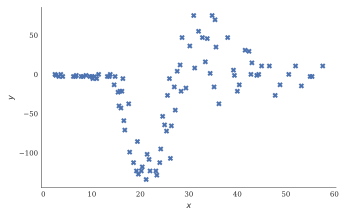

In [4]:
data = np.loadtxt('motor.dat')
X = data[:, 0][:, None]
Y = data[:, 1]
fig, ax = make_full_width_fig()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
save_for_book(fig, 'ch15.fig7')

Let's start with polynomial regression.
We just need to write code that calculates the design matrix.
Here is the code:

In [5]:
def get_polynomial_design_matrix(x, degree):
    """Returns the polynomial design matrix of ``degree`` evaluated at ``x``.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    # Start with an empty list where we are going to put the columns of the matrix
    cols = []
    # Loop over columns and add the polynomial
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

Here is how the design matrix for degree 3 polynomial looks like:

In [8]:
Phi = get_polynomial_design_matrix(X, 3)
print(Phi[:5, :])

[[ 1.     2.4    5.76  13.824]
 [ 1.     2.6    6.76  17.576]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.6   12.96  46.656]
 [ 1.     4.    16.    64.   ]]


Let's now visualize the polynomials as a function of $x$ so that you get some intuition about how $y$ is expanded:

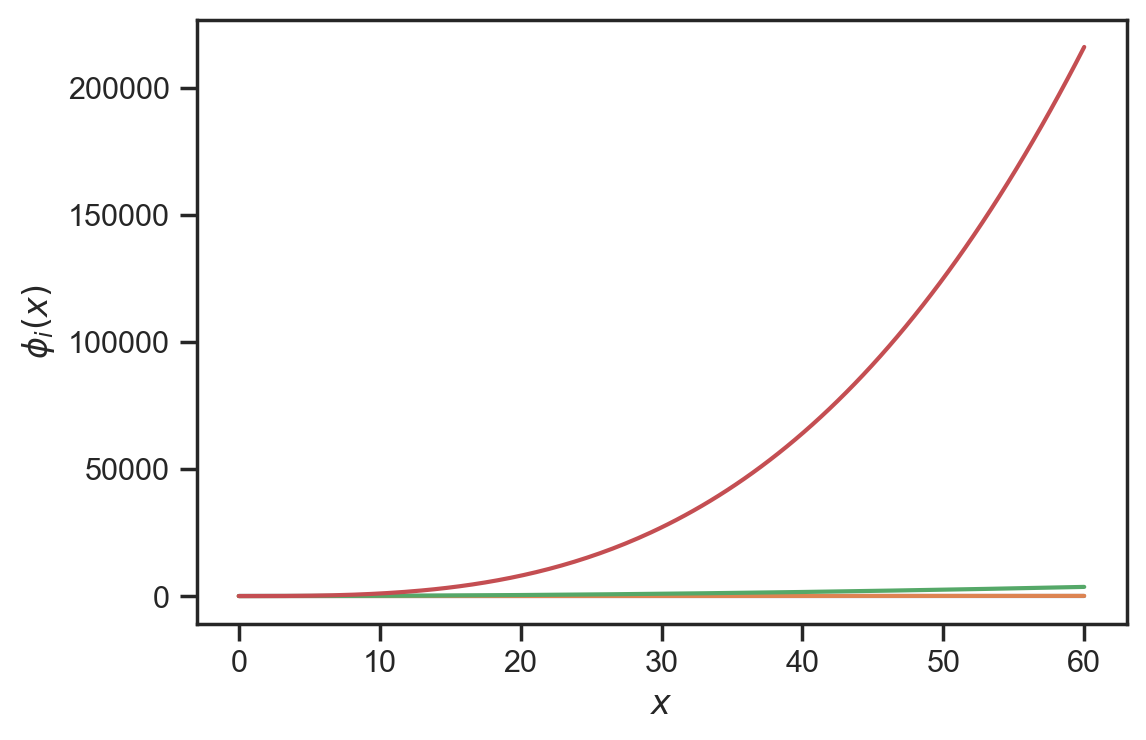

In [10]:
fig, ax = plt.subplots()
xx = np.linspace(0, 60, 200)
Phi_xx = get_polynomial_design_matrix(xx[:, None], 3)
plt.plot(xx, Phi_xx)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$');

Let's now solve the least squares problem:

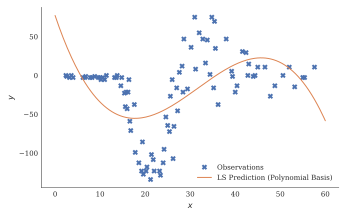

In [12]:
# Pick the polynomial degree
degree = 3
# Make the design matrix
Phi = get_polynomial_design_matrix(X, degree)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = make_full_width_fig()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Polynomial Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
save_for_book(fig, 'ch15.fig8')

### Questions

+ Experiment with polynomials of degree 4, 5, 10, 20
+ When are we underfitting?
+ When are we overfitting?
+ Which degree (if any) gives you the best fit?

## Example - Motorcycle data with radial basis functions

Let's now repeat what we did with polynomial regression with a Fourier basis.
The mathematical form of the basis is:

$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x)\right),
$$

and

$$
\phi_{2j+1}(x) = \sin\left(\frac{2j\pi}{L}x)\right),
$$

for $j=1,\dots,m/2$.
First, we write code that computes the design matrix for the new basis:

In [13]:
def get_fourier_design_matrix(x, L, num_terms):
    """Fourier expansion with ``num_terms`` cosines and sines.
    
    Arguments:
    
        L           -       The "length" of the domain.
        num_terms   -       How many Fourier terms do you want. This is not the number
                            of basis functions you get. The number of basis functions
                            is 1 + num_terms / 2. The first one is a constant.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(int(num_terms / 2)):
        cols.append(np.cos(2 * (i+1) * np.pi / L * x))
        cols.append(np.sin(2 * (i+1) * np.pi / L * x))
    return np.hstack(cols)

Let's start by visualizing the Fourier basis:

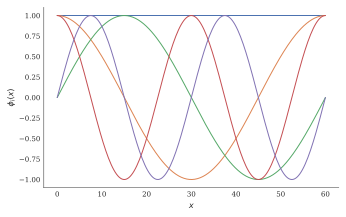

In [14]:
fig, ax = make_full_width_fig()
xx = np.linspace(0, 60, 200)
Phi_xx = get_fourier_design_matrix(xx[:, None], 60.0, 4)
plt.plot(xx, Phi_xx)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$')
save_for_book(fig, 'ch15.fig9')

Let's now solve the least squares problem:

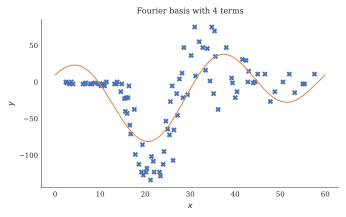

In [25]:
# Pick the parameters of the Fourier basis
L = 60.0
num_terms = 4
# Make the design matrix
Phi = get_fourier_design_matrix(X, L, num_terms)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_fourier_design_matrix(xx[:, None], L, num_terms)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = make_full_width_fig()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Fourier Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title(f'Fourier basis with {num_terms} terms')
#plt.legend(loc='best')
save_for_book(fig, 'ch15.fig12')

### Questions

+ Experiment with 4, 10, 20, 40, terms.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

## Example - Motorcycle data with radial basis functions

Let's now try out the radial basis functions.
The mathematical form is:
$$
\phi_i(x) = \exp\left\{-\frac{(x-x_i^c)^2}{2\ell^2}\right\},
$$
where $x_i^c$ are points about each the basis functions are centered.
We start with the code that evaluates the design matrix:

In [27]:
def get_rbf_design_matrix(x, x_centers, ell):
    """Radial basis functions design matrix.
    
    Arguments:
        x          -     the input points on which you want to evaluate the
                         design matrix
        x_center   -     the centers of the radial basis functions
        ell        -     the lengthscale of the radial basis function
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(x_centers.shape[0]):
        cols.append(np.exp(-(x - x_centers[i]) ** 2 / ell))
    return np.hstack(cols)

Now let's visualize the basis:

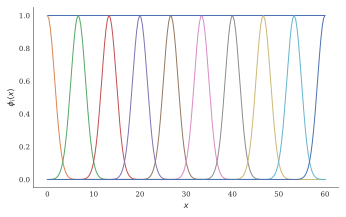

In [30]:
xx = np.linspace(0, 60, 200)
ell = 5.
num_terms = 10
x_centers = np.linspace(0, 60, num_terms)
Phi_xx = get_rbf_design_matrix(xx[:, None], x_centers, ell)
fig, ax = make_full_width_fig()
ax.plot(xx, Phi_xx)
ax.set_ylabel(r'$\phi_i(x)$')
ax.set_xlabel('$x$')
save_for_book(fig, 'ch15.fig13')

Now let's solve the least squares problem with this basis:

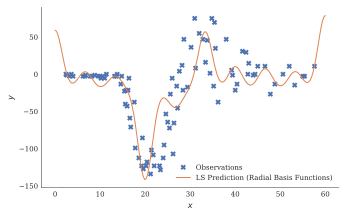

In [31]:
# Make the design matrix
Phi = get_rbf_design_matrix(X, x_centers, ell)
# Solve least squares problem
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
# Make prediction at a dense set of points
xx = np.linspace(0, 60, 200)
Phi_xx = get_rbf_design_matrix(xx[:, None], x_centers, ell)
Y_p = np.dot(Phi_xx, w_LS)
# Plot the predictions
fig, ax = make_full_width_fig()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(xx, Y_p, label='LS Prediction (Radial Basis Functions)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');
save_for_book(fig, 'ch15.fig14')

### Questions

+ Experiment with different values of ell and centers.
+ When are we underfitting?
+ Which one (if any) gives you the best fit?